<img align="left" style="padding-right:10px;" width="150" src="www/320px-Star_Wars_Logo.svg.png" />

*Este notebook forma parte del TEMA 1.4. HERRAMIENTAS DE ANÁLISI: PROGRAMACIÓN EN R Y PROGRAMACIÓN EN PYTHON del MÓDULO 1: HERRAMIENTAS BIG DATA del Máster en Big Data & Data Science de la Universitat de Barcelona - IL3 - FORYMAT elaborado por Ferran Carrascosa Mallafrè.*

[Índice](modulo1_tema4_Py_00_indice.ipynb) | [Elementos básicos de Python](modulo1_tema4_Py_10_elem_bas.ipynb) >

__[Abre en Colab](https://colab.research.google.com/github/griu/mbdds_fc20/blob/master/Python/modulo1_tema4_Py.ipynb)__ *: <span style="color:rgba(255, 99, 71, 0.8)">Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.</span>*

In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/griu/mbdds_fc20.git /content/mbdds_fc20
    !git -C /content/mbdds_fc20 pull
    %cd /content/mbdds_fc20/Python
    !python -m pip install -r requirementsColab.txt

# INTRODUCCIÓN

Python es una herramienta para la programación de propósito general. 

En los últimos años, se ha convertido en uno de los lenguajes de referencia para el *Data Science*. El motivo es que ha sabido rodearse de un gran ecosistema como [SciPy](https://www.scipy.org/) con librerías (numpy, pandas, scipy...) y herramientas (Jupyter, Spyder,...) orientadas al análisis y a la programación matemática.

Los desarrolladores de Python buscan hacer un lenguaje vivo y atractivo para el programador. Prueba de ello es que su nombre es un tributo a la compañia de humor británica *Monthy Python*.

El núcleo de su filosofía de programación se resume en el "*Zen de Python*", formado por 20 aforismos escritos por Tim Peters, 19 de los cuales se pueden leer más abajo importando `this`. El veinte, dijo Tim Peters que lo diría el creador de Python, Guido van Rossum, pero parece que aún no se ha pronunciado... 

In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


Ser *Pythoniano* o *Pythónico* significa utilizar correctamente el código, es decir, programar con un lenguaje simple y fácil de leer.

## ACTIVIDAD GUIADA 2

La actividad guiada, que te proponemos, en consonancia con los Pythonianos, es que te diviertas analizando datos relacionados con la saga de Star Wars: Planetas, Naves, Vehículos, Personajes y Especies.

Para ello, contamos con los datos de [SWAPI](https://swapi.dev/), acrónimo de STAR WARS API, que nos da acceso libre a una colección de datos de la saga.

Estos datos se han descargado y preparado expresamente para este curso. Puedes encontrar el código utilizado en el [Anexo: README de Python](modulo1_tema4_Py_60_anexo.ipynb), capítulo "IMPORTAR DATOS DE STARWARS SWAPI".

Para cargar los datos y visualizar su contenido.

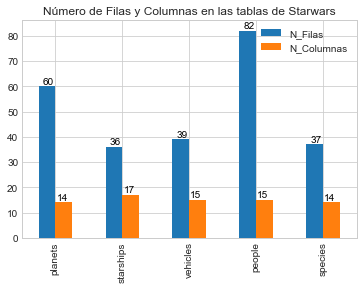

In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
plt.style.use('seaborn-whitegrid')

entidades = ['planets','starships','vehicles','people','species']
entidades_df = {x: pd.read_pickle('www/' + x + '_df.pkl') for x in entidades}
entidades_count = {k: v.shape for k,v in entidades_df.items()}
entidades_count_df = pd.DataFrame.from_dict(entidades_count, orient='index', columns=['N_Filas', "N_Columnas"])

g = entidades_count_df.plot.bar()
plt.title("Número de Filas y Columnas en las tablas de Starwars")
#g.title = 'Entidad de Starwars'
for i, (k, row) in enumerate(entidades_count_df.iterrows()):
    g.text(i-0.1, row['N_Filas']+1, row['N_Filas'], color='black', ha="center")
    g.text(i+0.1, row['N_Columnas']+1, row['N_Columnas'], color='black', ha="center")


Vemos que los datos están formados por 5 conjuntos. Por ejemplo, `people`, contienen 82 personajes descritos mediante 16 variables.

Una muestra de los datos de los personajes.

In [4]:
entidades_df['people'].head()

,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
name,,,,,,,,,,,,,,,
Luke Skywalker,172.0,77.0,blond,fair,blue,19.0,male,http://swapi.dev/api/planets/1/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[],"[http://swapi.dev/api/vehicles/14/, http://swa...","[http://swapi.dev/api/starships/12/, http://sw...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,http://swapi.dev/api/people/1/
C-3PO,167.0,75.0,n/a,gold,yellow,112.0,none,http://swapi.dev/api/planets/1/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[http://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,http://swapi.dev/api/people/2/
R2-D2,96.0,32.0,n/a,"white, blue",red,33.0,none,http://swapi.dev/api/planets/8/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[http://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,http://swapi.dev/api/people/3/
Darth Vader,202.0,136.0,none,white,yellow,41.9,male,http://swapi.dev/api/planets/1/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[],[],[http://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,http://swapi.dev/api/people/4/
Leia Organa,150.0,49.0,brown,light,brown,19.0,female,http://swapi.dev/api/planets/2/,"[http://swapi.dev/api/films/1/, http://swapi.d...",[],[http://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,http://swapi.dev/api/people/5/


Observa que hay variables numéricas como la altura, peso, edad (en años ABY Antes de la Batalla de Yavin). Otras categóricas, como el género del personaje. Incluso variables en formato de lista, como las películas en las que salió el personaje y los vehículos y naves que condujo...

```
"Yoda habló de otra." 
"La otra de quién habló es tu hermana gemela.» 
― Luke Skywalker y Obi-Wan Kenobi
```

> Te acordabas que Luke y Leia eran gemelos? ¿Sabías que su padre (Anakin, posteriormente Darth Vader tenía 22 años cuando los tuvo?

Podrás analizar todo esto y mucho más, en los datos y así convertirte en el auténtico Jedi que sabemos que llevas dentro.

Consulta la [Documentación de SWAPI](https://swapi.dev/documentation) sobre sus tablas y campos.

*Y que la fuerza te acompañe...*

< [Índice](modulo1_tema4_Py_00_indice.ipynb) | [Elementos básicos de Python](modulo1_tema4_Py_10_elem_bas.ipynb) >

__[Abre en Colab](https://colab.research.google.com/github/griu/mbdds_fc20/blob/master/Python/modulo1_tema4_Py.ipynb)__ *: <span style="color:rgba(255, 99, 71, 0.8)">Padawan! Cuando inicies sesión en Colab, prepara el entorno ejecutando el siguiente código.</span>*